# The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. 
Our solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes

In [3]:
# Importing the needed libraries.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Loading our dataset from the link http://bit.ly/FinancialDataset

df=pd.read_csv('http://bit.ly/FinancialDataset')

In [4]:
# Checking the number of records in the dataset.
print('The dataset has ' +str(df.shape[0])+ ' Rows and ' +str(df.shape[1])+ ' Columns')

The dataset has 23524 Rows and 13 Columns


In [5]:
# Previewing the dataset
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# Preview from the bottom
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [7]:
#checking the data types in every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question.

# Find and deal with outliers, anomalies, and missing data within the dataset.


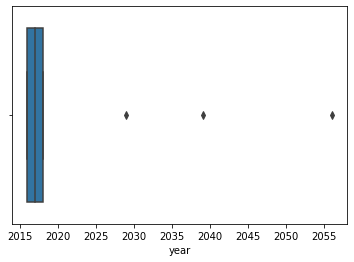

In [9]:
# checking for outliers
sns.boxplot(x=df['year'])

In [12]:
#Checking for missing data
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [18]:
# Dealing with null values by dropping them

df1= df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)
df1.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [20]:
# Checking the new record size
print('The dataset now has ' +str(df1.shape[0])+ ' Rows and ' +str(df1.shape[1])+ ' Columns')

The dataset now has 23343 Rows and 13 Columns


In [31]:
# Cleaning the column headers space
df1.columns = df1.columns.str.replace(' ','_')
df1.head()

,country,year,uniqueid,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,The_relathip_with_head,marital_status,Level_of_Educuation,Type_of_Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# Perform univariate, bivariate and multivariate analysis recording your observations.

Univariate analysis

In [33]:
# checking the frequency 
print('Marital status frequency')
print(df1.marital_status.value_counts())
print('gender of respondent frequency')
print(df1.gender_of_respondent.value_counts())
print('level of education frequency')
print(df1.Level_of_Educuation.value_counts())

Marital status frequency
Married/Living together    10700
Single/Never Married        7903
Widowed                     2683
Divorced/Seperated          2049
Dont know                      8
Name: marital_status, dtype: int64
gender of respondent frequency
Female    13767
Male       9576
Name: gender_of_respondent, dtype: int64
level of education frequency
Primary education                  12689
No formal education                 4467
Secondary education                 4207
Tertiary education                  1144
Vocational/Specialised training      801
6                                     27
Other/Dont know/RTA                    8
Name: Level_of_Educuation, dtype: int64


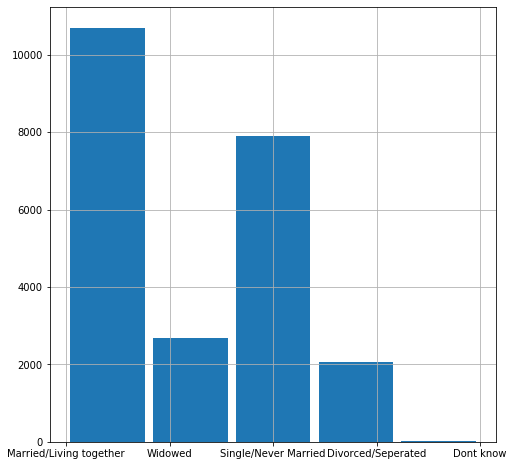

In [76]:
# Marital status
df1['marital_status'].hist(bins=5, rwidth=0.9, figsize=(8,8))

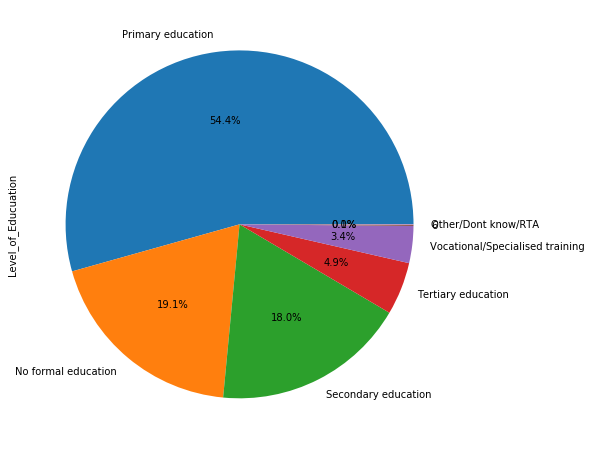

In [72]:
# checking the size of the population in each level of education
#plt.hist(df1['Level_of_Educuation'], bins= 10, histtype='bar', rwidth=9.9)
plt.figure(figsize=(10,8))
df1['Level_of_Educuation'].value_counts().plot(kind= 'pie', autopct='%.1f%%')

In [70]:
df1.describe()

,year,household_size,Respondent_Age
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.


In [83]:
#Factor analysis
# Install factor analyser
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df1)
chi_square_value,p_value
# p_value is 1.7 therefore is not enough

(407.45564519995196, 1.7639790569230074e-46)

In [84]:
#principal component analysis
x= df1.drop('marital_status', 1)
y= df1['marital_status']

In [86]:
#splitting the dataset  to get training data and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2)

In [ ]:
#normalizing
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

Challenge your solution by providing insights on how you can make improvements.